In [23]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

## mpg 데이터셋 이용

#### 1. mpg 데이터셋을 읽어온다

In [11]:
mpg_data = sns.load_dataset("mpg")
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


#### 2. 데이터의 기본 정보 확인하기

In [12]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### 3. 결측치 개수 확인

In [13]:
mpg_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [14]:
mpg_data[mpg_data['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


#### 4. 결측치 처리 (평균값으로)

In [15]:
mpg_data['horsepower'].fillna(mpg_data['horsepower'].mean(), inplace=True)
mpg_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

#### 5. 범주형데이터(origin)를 숫자로 변환 ('usa':0, 'europe':1, 'japan':2)

In [19]:
mpg_data['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [20]:
## 새로운 항목('origin_encoded')에 숫자로 저장

mpg_data['origin_encoded']=mpg_data['origin'].map({'usa': 0, 'europe': 1, 'japan': 2})
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_encoded
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,1
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0


#### 6. 원하는 항목만 선택

In [21]:
subset = mpg_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_encoded']]
subset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encoded
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,1
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


#### 7. 표준화 (평균을 0, 표준편차 1로 변환)

In [27]:
# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
subset_st = scaler.fit_transform(subset.drop(['mpg'], axis=1))    # 범주형 데이터는 제거하는 것이 좋다

subset_st

array([[ 1.49819126,  1.0906037 ,  0.66919608, ..., -1.29549834,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.5035143 ,  1.58659918, ..., -1.47703779,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.19623199,  1.19342642, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [-0.85632057, -0.56103873, -0.53653371, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [-0.85632057, -0.70507731, -0.66759129, ...,  1.10082237,
         1.62198339, -0.71514478],
       [-0.85632057, -0.71467988, -0.58895674, ...,  1.39128549,
         1.62198339, -0.71514478]], shape=(398, 7))

In [28]:
# 표준화된 데이터를 판다스 데이터프레임으로 변환
subset_st_df = pd.DataFrame(subset_st, columns=subset.columns[1:])
subset_st_df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encoded
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,1.621983,-0.715145
394,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,1.621983,0.533222
395,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,1.621983,-0.715145
396,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,1.621983,-0.715145


#### 8. 상관행렬

In [29]:
corr_matrix = subset_st_df.corr()
corr_matrix

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encoded
cylinders,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model_year,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin_encoded,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


#### 9. 히트맵 그리기

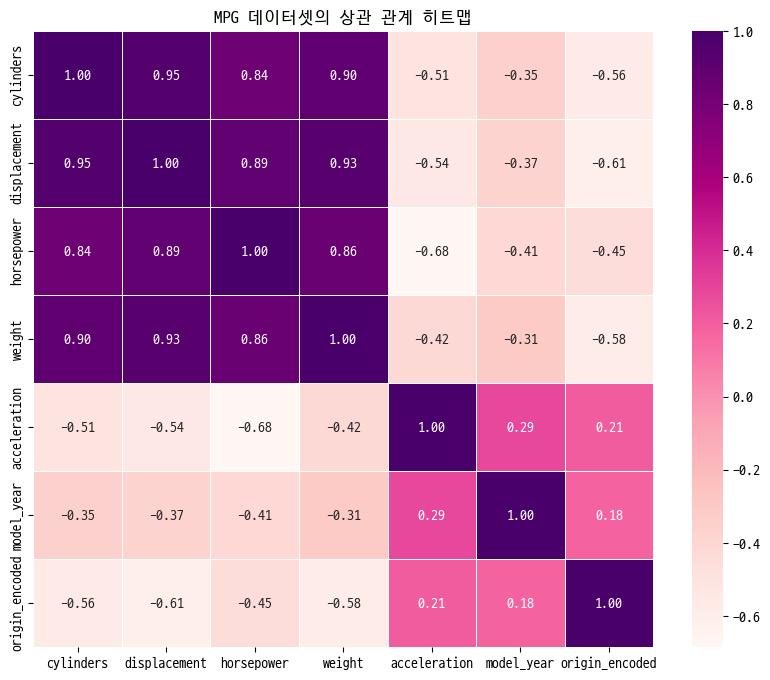

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap = 'RdPu', fmt = '.2f', linewidths=.5 )# , cbar=False)
plt.title('MPG 데이터셋의 상관 관계 히트맵')
plt.show()